# US Census Commute Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Travel Times To Work in the US

In [3]:
travel_times = pd.read_csv('travel_times_to_work.csv')

In [4]:
travel_times.head()

,US Travel Times to Work,Total Workers
0,Less than 10 Minutes,17483569
1,10 to 29 Minutes,69319607
2,30 to 59 Minutes,40641128
3,60+ Minutes,12503861


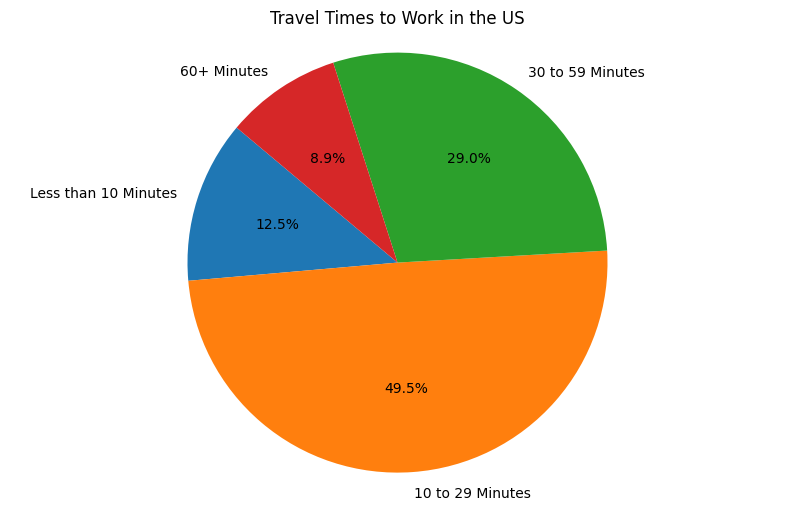

In [7]:
# Pie chart of travel times
plt.figure(figsize=(10, 6))
plt.pie(travel_times['Total Workers'], labels=travel_times['US Travel Times to Work'], autopct='%1.1f%%', startangle=140)
plt.title('Travel Times to Work in the US')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()